<a href="https://colab.research.google.com/github/zxb-97/NLP1/blob/main/NLPproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Project

**Group members** :

*   Xhacu Bejaj 2055172 Computer engineering (AI and Robotics)
*   Ergys Meda  2071547







# Dataset description




This dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?resource=download&select=1429_1.csv). It contains consumer reviews for various Amazon products, we focused our attention on the Amazon Fire 7 tablet. We modified the dataset by filtering for the single product we were interested in and removed columns we deemed as irrelevant for our task such as review.userCity, review.DidPurchase etc.. The code below produced the dataset we worked with.

In [ ]:
'''

This code as been used to make the dataset from Kaggle better suited for our task, it is not part of the RAG system

Please do not run this cell

'''


import csv
from datetime import datetime

# This function filters out the rows containing the single product we're interested in
# It also removes columns we deemd as unnecessary

def parse_reviews(input_file_path, output_file_path, filter_string):
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)

        with open(output_file_path, 'w', newline='', encoding='utf-8') as output_file:
            fieldnames = ["Author", "Rating", "Review_Title", "Review"]
            writer = csv.DictWriter(output_file, fieldnames=fieldnames)
            writer.writeheader()

            for row in reader:
                if filter_string in row['name']:

                    author = row["reviews.username"]
                    rating = row["reviews.rating"]
                    review_title = row["reviews.title"]
                    review = row["reviews.text"]


                    writer.writerow({

                        "Author": author,
                        "Rating": rating,
                        "Review_Title": review_title,
                        "Review": review,

                    })

# Define input and output file paths
input_file_path = 'amazon.csv'
output_file_path = 'parsedReviews.csv'

# Define the filter string
filter_string = 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers'

# Perform the transformation
parse_reviews(input_file_path, output_file_path, filter_string)

# Getting the dataset from github


In [1]:

import requests
import pandas as pd


# The file is downloaded from our github
url = "https://raw.githubusercontent.com/zxb-97/NLP1/main/parsedReviews.csv" # This is the dataset resulting after running the code
                                                                             # above on the dataset downloaded from Kaggle

filename = "parsedReviews.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check is request worked
if response.status_code == 200:
  with open(filename,"wb") as file:
    file.write(response.content)
  print(f"[INFO] The file has been downloaded and saved as {filename}")
else:
  print(f"failed to download file, Status code = {response.status_code}")






[INFO] The file has been downloaded and saved as parsedReviews.csv


# Dataset cleaning



In [2]:
import pandas as pd
import re


# Load the CSV file into a Pandas DataFrame for easier dataset cleaning
df = pd.read_csv('parsedReviews.csv')

# Replace multiple periods ('...') with a single comma
df['cleaned_review_text'] = df['Review'].str.replace(r'\.{2,}', ',', regex=True)

# Replace single period  with a single comma
df['cleaned_review_text'] = df['Review'].str.replace(r'\.', ',', regex=True)

# Replace hyphens and exclamation marks with commas
df['cleaned_review_text'] = df['Review'].str.replace(r'[-!]', ',', regex=True)

# Replace multiple whitespaces with only one
df['cleaned_review_text'] = df['cleaned_review_text'].str.replace(r'\s+', ' ', regex=True)

# Remove any whitespace preceding period or comma
df['cleaned_review_text'] = df['cleaned_review_text'].str.replace(r'\s+([.,])', r'\1', regex=True)




# Convert text to lowercase
df['cleaned_review_text'] = df['cleaned_review_text'].str.lower()






# Dataset profiling

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


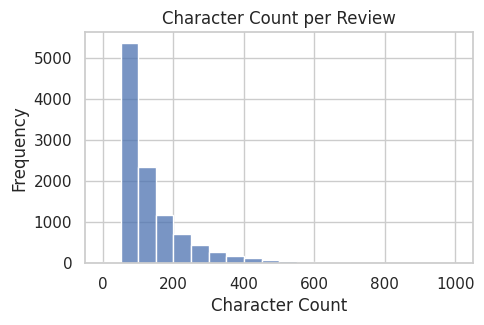

,Rating,word_count,char_count,sentence_count,word_count_per_sentence
count,10962.000000,10966.000000,10966.000000,10966.000000,10966.000000
mean,4.453293,28.247766,146.408080,2.331114,12.717592
std,0.801797,28.697612,151.751671,1.678292,7.047393
min,1.000000,1.000000,6.000000,1.000000,1.000000
25%,4.000000,13.000000,68.000000,1.000000,8.333333
50%,5.000000,20.000000,101.000000,2.000000,11.250000
75%,5.000000,33.000000,167.000000,3.000000,15.000000
max,5.000000,576.000000,3095.000000,30.000000,106.000000


In [3]:
import pandas as pd
from nltk.tokenize import sent_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# This library contains the sent_tokenize function
nltk.download('punkt')

'''

Descriptive statistics

'''
# Compute word count
df['word_count'] = df['cleaned_review_text'].apply(lambda x: len(x.split(" ")))

# Compute character count
df['char_count'] = df['cleaned_review_text'].apply(len)

# Compute sentence count
df['sentence_count'] = df['cleaned_review_text'].apply(lambda x: len(sent_tokenize(x)))

# Word count per sentence
df['word_count_per_sentence'] = df['word_count'] / df['sentence_count']



'''

This plot will help us visualize the distribution of characters among the reviews

'''
# Plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(df['char_count'], bins=range(0, 1001, 50), kde=False)

# Add labels
plt.title('Character Count per Review')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Table with a summary of the computed statistics
df.describe()









# Considerations on dataset profile

As we can see from the table and the plot,  the reviews vary considerably in length, meanwhile most senteces lengths are about the average for the english language which is about 15-20 words per sentence (Cutts,2020). Moreover, after reading a few hundreds reviews we made the assumption that each sentence provides a different information regarding the product, even tho this is not always the case. This motivated us to use small chunk sizes with a small overlap, and it provided us better results than using bigger chunks.

# Installing the required libraries

In [4]:
!pip install -U -q "langchain" "transformers==4.31.0" "datasets==2.13.0" "peft==0.4.0" "accelerate==0.21.0" "bitsandbytes==0.41.3" "trl==0.4.7" "safetensors>=0.3.1"

!pip install -U langchain-community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.6/983.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

# Description of the libraries used


*   [**langchain**](https://github.com/langchain-ai/langchain):  This package provide tools to work with LLMs
*   [**transformers:**](https://github.com/huggingface/transformers) Library that contains the implementation of various models that allow us to load and fine-tune them
*   [**datasets:**](https://github.com/huggingface/datasets) Library that enables easy access to dataset for various tasks
*   [**peft:**](https://github.com/huggingface/peft)  This library offers parameter-efficient methods for fine-tuning pretrained models for any downstream task.
*   [**accelerate:**](https://github.com/huggingface/accelerate) Enables the code to be run across any distributed configuration
*   [**bitsandbytes**](https://huggingface.co/docs/transformers/main_classes/quantizationtps://): Used for model quantization, ie reduces memory consumption for inference  
*   [**trl:**](https://github.com/huggingface/trl): Used to apply reinforcement learning (RL) methods to fine-tune language models. The goal is to improve the models' performance on specific tasks by providing a feedback mechanism
*   [**safetensors:**](https://github.com/huggingface/safetensors) Library for safely storing tensors , where with safety is meant that downloaded files will not run arbitrary code
*   [**langchain-community:**](https://api.python.langchain.com/en/latest/community_api_reference.html) Package containing third-party integrations for LLMs , vector stores , retrievers







# Create documents from the cleaned dataframe


In [5]:
from langchain.schema import Document


documents = []

# Iterate over rows in the DataFrame df
for index, row in df.iterrows():
    # Create a Document object with page_content as review and other fields in metadata
    document = Document(
        page_content=row['cleaned_review_text'],
        metadata={
            'Author': row['Author'],
            'Review_Title': row['Review_Title'],
            'Row': index,

        }
    )
    # Append the document to the list
    documents.append(document)



# We decided to not include the rating in the metadata since the table showed that the vast majority of ratings are 4 or 5 stars,
# so to produce more meaningful embeddings we removed the ratings.




# Splitting the documents

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Define the splitting
text_splitter = RecursiveCharacterTextSplitter(
    # We specify separators so that each chunk is meaningful
        separators=[

        ",",
    ],
    chunk_size = 200, # Less than this value results in excessive chunking of long reviews



    chunk_overlap = 20,
    length_function = len, # the length function - in this case, character length (aka the python len() fn.)
)

With this split we went from 10k reviews to 13k documents, which seems a reasonable increase that will not break the sentences into nonsensical chunks

In [7]:
# Split the documents
reviews_documents = text_splitter.transform_documents(documents)
print(len(reviews_documents))

# Print 10 reviews
for i, review in enumerate(reviews_documents[:10], start=1):
    print(f"Review {i}: {review}")

# As we can see from the printed documents, reviews tend to remain whole if short, while the longer reviews get chunked.
# each chunk is made of a complete sentence




13527
Review 1: page_content='the sales people are really nice and knowledgeable to me i will come back again' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 0}
Review 2: page_content='great product and service and the sales man r really nice.' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 1}
Review 3: page_content='great product and service will refer to a friend. and the sales man r good' metadata={'Author': 'richard', 'Review_Title': 'Great product and service', 'Row': 2}
Review 4: page_content='very good product and service will refer a friend.' metadata={'Author': 'Richard', 'Review_Title': 'very good product and service.', 'Row': 3}
Review 5: page_content='great selections. hard to find assistance at times.' metadata={'Author': 'Scheu', 'Review_Title': 'Good selection.', 'Row': 4}
Review 6: page_content='this kindle is a basic and easy to use ereader. exactly what i wanted. the charge lasts for a long time so you don't have to worr

# Installing required libraries

In [8]:
!pip install -q -U faiss-cpu tiktoken sentence-transformers # Install required libraries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.0 MB/s eta 0:00:00


# Description of the libraries used



*   [**faiss-cpu**](https://pypi.org/project/faiss-cpu/) : This library is used for efficient similarity search of dense vectors
                
*   [**tiktoken**](https://github.com/openai/tiktoken)  : BPE tokenizer

*   [**sentence-transformers**](https://sbert.net/) : This library provides an easy way to use pre-trained sBERT like models




# Load documents into FAISS vector store


In [9]:
from langchain.embeddings import CacheBackedEmbeddings, HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore



# Embedding model to embed query and context
embed_model_id = 'sentence-transformers/paraphrase-MiniLM-L6-v2' # Maps sentences and paragraphs to a 384 dimensional dense vector space

'''
We built our vector store using FAISS : It wants dense vectors of any size, but size must be fixed

1) sentence-transformers/all-mpnet-base-v2 : With a vector space of 768 dimensions results were good but for some queries
                                             the retrieved documents didn't have the information necessary for the correct answer

2) sentence-transformers/all-MiniLM-L12-v2 :  Was able to find a complaints when asked while all-mpnet-base-v2 only found good reviews

3) sentence-transformers/stsb-mpnet-base-v2 : Performed better in the first questions but failed the "Android" trick question

4) sentence-transformers/stsb-roberta-base-v2 : Similar to stsb-mpnet-base-v2

5) sentence-transformers/all-distilroberta-v1 : Similar to stsb-mpnet-base-v2

6) sentence-transformers/paraphrase-MiniLM-L6-v2 : Best embedding model, it is capable of retrieving the right documents , for answering a user question

7) sentence-transformers/paraphrase-MiniLM-L12-v2 : Its performance is good but the L6 version results in better retrival

'''
# Instantiate the HuggingFaceEmbeddings class with the choosen embedding model
core_embeddings_model = HuggingFaceEmbeddings(
    model_name=embed_model_id
)



# Create the vector store with FAISS
vector_store = FAISS.from_documents(reviews_documents, core_embeddings_model)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Discussion on embedding model and vector store

After several iterations we found the FAISS vector store combined with the "sentence-transformers/paraphrase-MiniLM-L6-v2" embedding model to have the best performance. The embedding model produces vectors of fixed size (as required by FAISS) of 384 dimensions. We found that the model with 6 layers (L6) performed better than the 12 layer version , we think this can be explained by the fact that sentences are short, and the dataset is pretty small (10k reviews) , so a bigger model could tend to overfit. For similar reasons we found that embedding models yielding vectors of 384 dimensions as opposed to 768 performed better. This motivated us to choose FAISS instead of ANNOY which requires vectors of at least 768 dimensions, we ignored other vector stores such as Pinecone because they require an API key.

# Check if vector store works with a query

In [10]:
query = "How much RAM ?"
embedding_vector = core_embeddings_model.embed_query(query)
docs = vector_store.similarity_search_by_vector(embedding_vector, k = 4)

print(f"Number of documents indexed: {len(docs)}")

for page in docs:
  print(page.page_content)


Number of documents indexed: 4
, even at regular price of 50 dollars, it still is a good purchase. my only "concern" about it is that i wish it had another 1 gig of ram, totalling 2 instead of just 1 gb ram. enjoy :)
can't go wrong at 40 to 50 bucks.i also have the 8 inch and prefer the 7 in the hand.i bought the eight for the extra ram 2gb instead of 1 but haven't seen any differences in the 7 or 8 while using it
, but the 7" is lacking the additional 512mb of ram an 8gb of storage that make the 8" worth the additional money.
for the price is great for kids. i like that memory expansion can go up to 128gb


# Build Retrival chain

In [11]:
# In case of error run twice
!pip install -q  -U  huggingface_hub

In [12]:
# Log in so that we can use llama2
from huggingface_hub import notebook_login

notebook_login()

In [14]:
import torch
import transformers

# TODO :

# Add description of model choosen at the end

model_id = "meta-llama/Llama-2-13b-chat-hf"

# Configuration of BitsAndBytes quantization for the model
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True, # Weights of the model are stored using 4 bits
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True, # Quantize quantization constants
    bnb_4bit_compute_dtype=torch.bfloat16 # When computing an answer use bfloat16 instead of nf4
)                                         # this is done "when needed" meaning each layer (one at a time) will be upcasted as bfloat16, do its part of the computation
                                          # and get back to nf4


model_config = transformers.AutoConfig.from_pretrained(
    model_id
)

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto'
)

# Take a look at the model's parameters
model.eval()

# Save the model
#model_save_path = "./llama2_7b_chat_model"
#model.save_pretrained(model_save_path)


config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 5120)
    (layers): ModuleList(
      (0-39): 40 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (k_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (v_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (o_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (up_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (down_proj): Linear4bit(in_features=13824, out_features=5120, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): Lla

#Tokenizer

In [15]:

from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Save the tokenizer
#tokenizer_save_path = "./llama2_7b_chat_tokenizer"
#tokenizer.save_pretrained(tokenizer_save_path)

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

#Pack it into a pipeline for compatibility with LangChain

In [16]:


generate_text = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    return_full_text=True,
    temperature=0.2,
    max_new_tokens=256
)

In [17]:
from langchain.llms import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=generate_text)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


In [18]:
retriever = vector_store.as_retriever()

# Prompt design

In [19]:
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler
from langchain.callbacks.base import BaseCallbackHandler

class CustomCallbackHandler(BaseCallbackHandler):
    def on_chain_end(self, run_id, parent_run_id, chain, chain_end, tags=None, **kwargs):
        print("Chain execution completed!")
        print("---- Answer ----")
        print(chain_end.get('answer', 'No answer found')) # Iterate over source documents in chain_end
        print("---- Source Documents ----")
        for doc in chain_end.get('source_documents', []):
            print(f"Content: {doc.page_content}\n")

# Instantiate the custom callback handler
handler = CustomCallbackHandler()

# Create a RetrievalQA chain instance
qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    callbacks=[handler],
    return_source_documents=True  # Return source documents with the answer
)

In [20]:
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler
from langchain.callbacks.base import BaseCallbackHandler

# Format the prompt and the answer for better clarity
def handle_qa_with_sources(query_result):

    query_result = qa_with_sources_chain({"query" : query_result}) # Call the chain with the input question
    answer = query_result.get('result', 'No answer provided.') # Retrieve the generated answer
    sources = query_result.get('source_documents', []) #Retrieve source documents

    response =  answer.replace("Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer", "")

    # Iterate over retrieved source documents and format them
    for i, doc in enumerate(sources, 1):
        page_content = doc.page_content
        author = doc.metadata.get('Author', 'Unknown author')
        review_title = doc.metadata.get('Review_Title', 'No title')
        row = doc.metadata.get('Row', 'No row information')

        response += f"\n\nSource {i}: {author}, '{review_title}', Row {row}. Context: {page_content}\n"

    return response




# Tests

For each query add considerations on the retrieved docs, and answer given based on the docs retrieved. This is part 3 : Discussion of the prompt

In [ ]:
response = handle_qa_with_sources("What are some problems ?") # I want to see what it is capable of with little context given

print(response)

.

i have had some issues with this but not having a very helpful team to resolve issues.... i work and go to school i don't have time after time to beg and plead to get fixed...

, about 2 ft off the floor on carpet and the screen cracked. i called bestbuy and i was told that i had. free 6 months protection on it so i made an appointment with geek squad my husband called out of work to take me and when we go they tell me that i don't have any protrvtion plan and that there isn't anything they can do for me. honestly it got to me because i you can't do anything about it its fine just tell me. but don't male me gp allthe way there and waste my time. ended up buying a better and bigger tablet. although my amazon fire still works its screen is all cracked oh well.

i've purchased several kindles over the years & this is the only one that has given me issues. purchased this one & exchanged it. i eventually exchanged the exchange for the same reason. the first two kindles didn't want to tur

In [ ]:
response = handle_qa_with_sources(" Does it have a camera ?") # Specific question
print(response)

.

we only used this camera for a couple weeks but it does its job. is not slow or anything.. if you need it for reading or watching videos, or only for one thing at time is great.

i have had one before and i like the new camera feature on this one. easy to use and the clear picture.

works well and easy to use. this is a great camera for the price

i do like the camera. sorry that is all i have to say.

Question:  Does it have a camera ?
Helpful Answer:  Yes, it does have a camera.

Source 1: Edna, 'Nice for what we need', Row 2914. Context: we only used this camera for a couple weeks but it does its job. is not slow or anything.. if you need it for reading or watching videos, or only for one thing at time is great.


Source 2: Purvman, 'Good camera feature', Row 10552. Context: i have had one before and i like the new camera feature on this one. easy to use and the clear picture.


Source 3: Hifli, 'Great for the price', Row 5774. Context: works well and easy to use. this is a great

In [ ]:
response = handle_qa_with_sources("How many cameras does this tablet have?") # Let's get even more specific
print(response)

.

i wanted a tablet that would actually work, this also has a good camera

, not that i ever use the camera even on my $500 samsung, but just an fyi. haven't used it enough to really comment on functionality or reliability. in the end, it's a >$50 tablet

my kids say this tablet is great for their needs. the camera is poor, but not a big deal since they had no intention of using the tablet as a camera.

dual cameras work great. perfect compact size not too big or small. the best thing about the tablet is that you can add a sd card up to 128gb.

Question: How many cameras does this tablet have?
Helpful Answer: The tablet has dual cameras.

Source 1: Dasame, 'I like it', Row 4318. Context: i wanted a tablet that would actually work, this also has a good camera


Source 2: aachterhof, 'Nice basic tablet', Row 7124. Context: , not that i ever use the camera even on my $500 samsung, but just an fyi. haven't used it enough to really comment on functionality or reliability. in the end, it's 

In [ ]:
response = handle_qa_with_sources("What are the key features of this Amazon tablet?") # Generic question
print(response)

.

this is a nice small tablet, works well and great with amazon products, a great price,

another great amazon product, simple tablet that does what i need it to,

purchased this tablet at a great price! this tablet works very well within the amazon ecosystem, so it is best geared towards those with amazon prime, it has micro sd card slot which is a plus,

it's a good tablet that serves many functions, amazon is a great brand!

Question: What are the key features of this Amazon tablet?
Helpful Answer: Based on the reviews, the key features of this Amazon tablet include being a great price, working well with Amazon products, having a micro SD card slot, and being geared towards those with Amazon Prime.

Source 1: Warrior58, 'Nice', Row 2047. Context: this is a nice small tablet, works well and great with amazon products, a great price,


Source 2: User, 'Great', Row 8096. Context: another great amazon product, simple tablet that does what i need it to,


Source 3: PopT, 'Versatile tabl

In [ ]:
response = handle_qa_with_sources("Is the operating system Android?") # Trick question, let's see if it is able to answer correctly
                                                                      # even tho i put the keyword "Android"
print(response)

.

it's different than android system's. and to be honest i prefer android.

, but had hoped that since it was based on android, it would have the major android apps.

love the kindlefire...but don't like the operating system....needs to be more like android

, intending it as a gift for my daughter. i knew beforehand that it had a crippled android os. i also knew that it wouldn't be top of the line for the price paid. however

Question: Is the operating system Android?
Helpful Answer: No, the Kindle Fire does not run Android. It uses a custom operating system developed by Amazon.

Source 1: rawiso, 'good', Row 10592. Context: it's different than android system's. and to be honest i prefer android.


Source 2: Duck, 'Glorified eReader', Row 9017. Context: , but had hoped that since it was based on android, it would have the major android apps.


Source 3: JeAdams, 'Great for reading', Row 3839. Context: love the kindlefire...but don't like the operating system....needs to be more like 

In [ ]:
response = handle_qa_with_sources("What operating system does it use ?") # Let's see if it anwers correctly without the keyword "Android"
print(response)

.

everyone knows "kindle fire". when these went on sale i grabbed a few up to use as kiosks for our pta. little did i know that fires run a "special" operating system

, i welcomed the addition of a dual camera option plus the expansion of a microsd slot. this version of the fire is lighter in the hand and seems to hold up well to my handling of the device.the new os seems to work well in spite of the "commercial" aspect. after finding the appropriate setting to turn off the promotional ads

works very well. much better operating system than other cheap tablets. it has a quality feel as well.

, but i could see where it could be for someone that isn't savvy with computers/tablets.all that said in use, it runs decently

Question: What operating system does it use ?
Helpful Answer: The Kindle Fire uses a customized version of the Fire OS operating system.

Source 1: GraceK, 'Kindle Fire', Row 6167. Context: everyone knows "kindle fire". when these went on sale i grabbed a few up to use 

In [ ]:
response = handle_qa_with_sources("Is this tablet cheap ?") # Specific question
print(response)

.

this tablet is amazingly awesome. it looks like its price, cheap

this tablet is very affordable but its well made. for 40 bucks this is a steal.

good and easy to buy this tablet with low price, worth to buy

i was very satisfied with this tablet. it was priced really cheaply but it is a decent little tablet.

Question: Is this tablet cheap ?
Helpful Answer: Based on the context, it seems that the tablet is considered cheap by the users. The words "cheap", "affordable", and "low price" are used to describe the tablet's price. Additionally, the users mention that the tablet is well made and worth buying, despite its low price. Therefore, it can be inferred that the tablet is considered cheap.

Source 1: neio, 'Simply Great', Row 2601. Context: this tablet is amazingly awesome. it looks like its price, cheap


Source 2: Travo, '4 out of 5 starz', Row 4145. Context: this tablet is very affordable but its well made. for 40 bucks this is a steal.


Source 3: Prabhu, 'Good', Row 241. Con

In [ ]:
response = handle_qa_with_sources("How much does this tablet cost?") # More specific question
print(response)

.

great price for a very basic tablet. well worth the $$$

great price for a tablet. like the size and looks.

it is as expected. for a tablet that cost $50.... not bad

good price for the tablet. i brought this for my nephew

Question: How much does this tablet cost?
Helpful Answer: Based on the context, this tablet costs $50.

Source 1: Sabres4life, 'Great price', Row 8934. Context: great price for a very basic tablet. well worth the $$$


Source 2: Bexter57, 'Great product', Row 1101. Context: great price for a tablet. like the size and looks.


Source 3: TinHaw, 'Great for the price', Row 8961. Context: it is as expected. for a tablet that cost $50.... not bad


Source 4: Meena20, 'Amazon Tablet', Row 4533. Context: good price for the tablet. i brought this for my nephew



In [ ]:
response = handle_qa_with_sources("What is the screen quality of the tablet?")
print(response)

.

this tablet is actually really fast. the screen quality is also good.

i love this tablet and like quality of the picture and clarity of the screen

i needed something bigger than my phone screen to browse with and came across this tablet. the screen quality is good

a good enough tablet with great features and very decent screen quality.

Question: What is the screen quality of the tablet?
Helpful Answer: Based on the context, the screen quality of the tablet is good.

Source 1: Charly805, 'pretty good tablet', Row 5688. Context: this tablet is actually really fast. the screen quality is also good.


Source 2: Jstretch4567, 'Great tablet for beginners', Row 6263. Context: i love this tablet and like quality of the picture and clarity of the screen


Source 3: chipolopo, 'The tablet is good for the price', Row 1879. Context: i needed something bigger than my phone screen to browse with and came across this tablet. the screen quality is good


Source 4: gcumember, 'Good', Row 4667. C

In [ ]:
response = handle_qa_with_sources("Are customers satisfied or complaining about the screen of the tablet?") # Let's see it it can find contrasting information and how it deals with it
print(response)

.

quality of screen display is lacking and the reason i returned the tablet. for adult users i cannot recommend.

overall couldn't be more happier with the tablet works great for the price of it i would def recommend to my friends

we are more than satisfied with this tablet along with the price,

, you may be disappointed at first with the screen, however you need to realize where this tablet sits on the tablet echelon

Question: Are customers satisfied or complaining about the screen of the tablet?
Helpful Answer: Based on the customer reviews, some customers are satisfied with the tablet's performance and price, while others are complaining about the screen quality.

Source 1: BillyV, 'Good tablet for children.', Row 4787. Context: quality of screen display is lacking and the reason i returned the tablet. for adult users i cannot recommend.


Source 2: Kyle07, 'Great tablet', Row 2356. Context: overall couldn't be more happier with the tablet works great for the price of it i would

In [ ]:
response = handle_qa_with_sources("How do reviewers rate the battery life of the Amazon Fire tablet?") # I wanted to see if it is able to quote reviewers
print(response)                                                                                        # and produce a coherent answer

.

not long enough for battery life.confusion for amazon app user.to be careful if i plan to use in the future.

, i thought that i may have a faulty tablet, but i looked on amazon's website and the fire has a battery life of 7 hours...no wonder.the size of the fire

, even though they were not officially sanctioned by amazon. battery life leaves a little to be desired and the tablet can get warm. cameras are not good at all

amazon fire tablet has been working well. it seems to hold battery charge reasonably well. it wouldn't be great for the youngest kids due to all the amazon product advertisements, but great for him.

Question: How do reviewers rate the battery life of the Amazon Fire tablet?
Helpful Answer: Based on the reviews provided, reviewers rate the battery life of the Amazon Fire tablet as follows:

* One reviewer mentions that the battery life is not long enough, indicating a short battery life.
* Another reviewer notes that the battery life is only 7 hours, which may not

# Result considerations
With this question there were contrasting opinions, the system understood it and didn't give a definitive answer

In [ ]:
response = handle_qa_with_sources("What do customers complain about?") # Generic complaints
print(response)

.

so far the only complaint i have is not with the product but with the policy regarding the product. i had one for just about 2 weeks when i noticed a definite issue staying connected. my wife

, i took them to the store to exchange them and i learned that not only that best buy would not exchange/refund them but that you don't carry the amazon cards. you have just last a good customer when it comes to purchasing some items that i can purchase online at amazon or another store. i purchased an hp pc and a 12" apple ipad at another store just to make a point. i was and still are very disappointed with your sales staff

, they can do ads" or something like that.i kinda get that, and for most people this may not be a big deal. but for my reasons, this is a bit unprofessional to have. so when buying it

, we're not available on amazon. this was a big disappointing factor for the young people using the product. the other big complaint we have with this product is the length of the charging

In [ ]:
response = handle_qa_with_sources("What are the  complaints about screen quality?") # Specific complaints
print(response)

.

not as good as i though, but at least it does what it is suppoused. very bad screen quality

for the price, it cannot be beat. the screen isn't the best quality but for the price it is sufficient

good, but unhappy that screen size is small, less than i expected

quality of screen display is lacking and the reason i returned the tablet. for adult users i cannot recommend.

Question: What are the  complains about screen quality?
Helpful Answer: Based on the reviews, the complaints about screen quality are that it is not the best and lacks quality display. Some users mentioned that the screen size is smaller than expected.

Source 1: Elvis, 'Good', Row 6530. Context: not as good as i though, but at least it does what it is suppoused. very bad screen quality


Source 2: Btc0526, 'Great', Row 7841. Context: for the price, it cannot be beat. the screen isn't the best quality but for the price it is sufficient


Source 3: shibu, 'Good', Row 122. Context: good, but unhappy that screen size

# Prompt Engineering
Here we will test our model with different questions and analyze them

# Cost questions



                                                                        

Firstly we start with some questions about the costs. Starting with a general query, we will progressively narrow down to more specific questions.

### Answer:
  Yes, based on the context provided, the product is described as "very affordable" and "a great product for folks who want a good product with an affordable price."

### Short analysis
The answer is precise.

In [25]:
response = handle_qa_with_sources("Is it affordable")
print(response)

.

, it is very affordable

affordable, and it gets the job done. not the most cutting,edge device, but nice nonetheless.

it does what i need it to do and if very affordable

does everything i expected it to do. definitely a great product for folks who want a good product with an affordable price.

Question: Is it affordable
Helpful Answer: Yes, based on the context provided, the product is described as "very affordable" and "a great product for folks who want a good product with an affordable price."

Source 1: julz, 'Screen can be improved', Row 4423. Context: , it is very affordable


Source 2: Famr, 'Awesome!', Row 741. Context: affordable, and it gets the job done. not the most cutting,edge device, but nice nonetheless.


Source 3: lookatmenow, 'Great buy', Row 2683. Context: it does what i need it to do and if very affordable


Source 4: Joanne, 'Excellent', Row 7282. Context: does everything i expected it to do. definitely a great product for folks who want a good product with 

### Answer:
Based on the context, it appears that the device costs $50.

### Short analysis
Still the answer is correct by majority of reviews

In [26]:
response = handle_qa_with_sources("How much does it cost?")
print(response)

.

for $35 you can't go wrong, even at the reg price of $50 i would recommend this to anyone. does everything i need it to and more. web surfing

for the price

for the price

, but it only cost $50. that makes it so i'm not so concerned if it gets broken or lost. i've watched some videos on it and the display seems fine. mostly i use it to read e

Question: How much does it cost?
Helpful Answer: Based on the context, it appears that the device costs $50.

Source 1: Xkwzt, 'Tablet for the kids', Row 6658. Context: for $35 you can't go wrong, even at the reg price of $50 i would recommend this to anyone. does everything i need it to and more. web surfing


Source 2: BH2010, 'Awesome for the price', Row 1657. Context: for the price


Source 3: smbroncos07, 'Great Entry Tablet', Row 6047. Context: for the price


Source 4: cascadia, 'my first tablet', Row 2500. Context: , but it only cost $50. that makes it so i'm not so concerned if it gets broken or lost. i've watched some videos on it 

### Answer:
Yes, there are several discounts and promotions available on Amazon. For example, you can get a discount on the Fire 7 tablet if you sign up for a free trial of Amazon Prime. Additionally, Amazon often offers deals and discounts on certain products during holiday seasons and special events. You can check the Amazon website or mobile app for current promotions and discounts.


### Short analysis
Good answer again

In [27]:
response = handle_qa_with_sources("Are there any discounts or promotions that i can buy cheaper at AMAZON?")
print(response)

.

has a great price if you don't mind all the advertising ads everywhere, limited apps offered by amazon.

, but it's definitely the best at this price point. it has all of the features i was looking for without the fluff. it may be limiting if you don't have an amazon account

even though you need to have a amazon prime membership to fully exploit the tab, it comes at a very very cheap price.

, and surf the web. although you have to pay for most book/video purchases amazon also offers amazon prime for a month free ($9.99 after) which makes some purchases less expensive. you can also tack on kindle unlimited (free 1st month

Question: Are there any discounts or promotions that i can buy cheaper at AMAZON?
Helpful Answer: Yes, there are several discounts and promotions available on Amazon. For example, you can get a discount on the Fire 7 tablet if you sign up for a free trial of Amazon Prime. Additionally, Amazon often offers deals and discounts on certain products during holiday sea

### Answer:
 Based on the context, it seems that the tablet is a bargain compared to other tablets in the same price range. The reviewer mentions that they have used tablets before that cost a lot more money, but this one is just as good if not better. Additionally, the reviewer notes that most tablets in this price range have the quality to show for it, but this unit does as well, despite being much cheaper. Therefore, it can be concluded that the tablet is not expensive compared to other similar tablets.



### Short analysis
Good answer based on many reviews that have same context.

In [28]:
response = handle_qa_with_sources("Is it expensive compared to other similar tablets?")
print(response)

.

as good if not better than many other more expensive tablets

i have used tablets before that cost a lot more money. for the price this tablet is a bargain.

most tablets in this price range have the quality to show for it. that is not the case with this unit.while only $50

u can do so much with this tablet, compare to the more expensive ones

Question: Is it expensive compared to other similar tablets?
Helpful Answer: Based on the context, it seems that the tablet is a bargain compared to other tablets in the same price range. The reviewer mentions that they have used tablets before that cost a lot more money, but this one is just as good if not better. Additionally, the reviewer notes that most tablets in this price range have the quality to show for it, but this unit does as well, despite being much cheaper. Therefore, it can be concluded that the tablet is not expensive compared to other similar tablets.

Source 1: Joseph, 'Great Product for perfect Price', Row 10485. Context: 

Lets stay still in the price region but now we also make the question so it includes the quality also

### Answer:
 Based on the context, it seems that the tablet is a bargain compared to other tablets within its quality range. The speaker mentions that other tablets in this price range have quality to show for it, but this tablet does not. However, despite its lower cost, it still has features that more expensive tablets have. Therefore, it can be inferred that the tablet is a good value for its price.




### Short analysis
Still we have an answer based on many sources that has good quality. Until now Llama2 has been very accurate.

In [29]:
response = handle_qa_with_sources("Compared to the other tablets withing its quality range, does it cost more?")
print(response)

.

most tablets in this price range have the quality to show for it. that is not the case with this unit.while only $50

this tablet is very affordable and has more then enough things to do on it. has features more expensive tablets have at a fraction of the cost. if something were to happen to it

i have used tablets before that cost a lot more money. for the price this tablet is a bargain.

i should've bought more when i had the chance. it's a compact tablet and good for the value.

Question: Compared to the other tablets withing its quality range, does it cost more?
Helpful Answer: Based on the context, it seems that the tablet is a bargain compared to other tablets within its quality range. The speaker mentions that other tablets in this price range have quality to show for it, but this tablet does not. However, despite its lower cost, it still has features that more expensive tablets have. Therefore, it can be inferred that the tablet is a good value for its price.

Source 1: Tgle

# Operating System and softwares



Now we pass to asking about OS

### Answer:
The Kindle Fire uses a customized version of the Fire OS operating system




### Short analysis
The question even though simple, it was mistaken from some of the models because FIRE OS is part of Android. Here it doesn't say it specifically so we continue with more questions

In [30]:
response = handle_qa_with_sources("What operating system does it use?")
print(response)

.

everyone knows "kindle fire". when these went on sale i grabbed a few up to use as kiosks for our pta. little did i know that fires run a "special" operating system

, i welcomed the addition of a dual camera option plus the expansion of a microsd slot. this version of the fire is lighter in the hand and seems to hold up well to my handling of the device.the new os seems to work well in spite of the "commercial" aspect. after finding the appropriate setting to turn off the promotional ads

works very well. much better operating system than other cheap tablets. it has a quality feel as well.

, but i could see where it could be for someone that isn't savvy with computers/tablets.all that said in use, it runs decently

Question: What operating system does it use?
Helpful Answer: The Kindle Fire uses a customized version of the Fire OS operating system.

Source 1: GraceK, 'Kindle Fire', Row 6167. Context: everyone knows "kindle fire". when these went on sale i grabbed a few up to use a

Lets ask about if it is Android or not.
### Answer:
Yes, the operating system on the device is based on Android, but it is not a full-fledged Android system and lacks many of the features and apps available on a standard Android device.


### Short analysis
The answer is on point. That's what we were looking for and Llama delivered a good answer.

In [32]:
response = handle_qa_with_sources("Is its operating system considered Android?")
print(response)

.

it's different than android system's. and to be honest i prefer android.

, but had hoped that since it was based on android, it would have the major android apps.

, if any company is going to integrate the androidos at least make it user friendly and 100% open. it's basically like purchasing half of a device or a demo device.

, intending it as a gift for my daughter. i knew beforehand that it had a crippled android os. i also knew that it wouldn't be top of the line for the price paid. however

Question: Is its operating system considered Android?
Helpful Answer: Yes, the operating system on the device is based on Android, but it is not a full-fledged Android system and lacks many of the features and apps available on a standard Android device.

Source 1: rawiso, 'good', Row 10592. Context: it's different than android system's. and to be honest i prefer android.


Source 2: Duck, 'Glorified eReader', Row 9017. Context: , but had hoped that since it was based on android, it would 


### Answer:
Based on the review, it appears that the Fire tablet runs a modified version of Android that is different from stock Android. The reviewer mentions that the tablet does not have access to the Google Play Store, which is a key difference from stock Android devices. Additionally, the reviewer notes that the tablet's app store is not as good as Android, suggesting that the Fire tablet's software is customized in some way.


### Short analysis
It tells that even though it is Android, it's not stock Android and lists some problems. So it is a goo answer based on specific contexts.

In [33]:
response = handle_qa_with_sources("How is it different from stock Android?")
print(response)

.

it's different than android system's. and to be honest i prefer android.

, web browsing, etc) than i expected based on my experiences with other tablets at similar price points.,as an amazon tablet, this runs a modified version of android, but does not have baked

it is an excellent tablet, however it's app store is not as good as android.

, works well. doesn't seem to be able to use apps from google play store which was a surprise and disappointment to me. all in all, i would've chosen another android tablet.

Question: How is it different from stock Android?
Helpful Answer: Based on the review, it appears that the Fire tablet runs a modified version of Android that is different from stock Android. The reviewer mentions that the tablet does not have access to the Google Play Store, which is a key difference from stock Android devices. Additionally, the reviewer notes that the tablet's app store is not as good as Android, suggesting that the Fire tablet's software is customized in


### Answer:
Based on the reviews, it seems that users have mixed opinions about the Fire HD 8's iOS operating system. Some users find it to be user-friendly and easy to navigate, while others may prefer a more customizable interface. However, it's worth noting that the Fire HD 8 is not an iOS device, it runs on Amazon's customized version of Android.



### Short analysis
The question was tricky and Llama2 failed partially. Even though it sasys again that it's a customized version of Android, it fails at introduction based on our question.

In [34]:
response = handle_qa_with_sources("Do users like its IOS operating system?")
print(response)

.

if you are fan of ios and ipad then you will not like this product. i prefer to give it to either kids who want to play and watch videos or people who loves to read( only if they amazon prime account).

think of it as a solid, but generic ipad. it's not as impressive as what apple does, but it's respectable. purchased for a friend and he's loving it.

bought it for my husband as i have an apple ipad. he loves it.

this is not as cheap feeling as i thought it was going to be. it's definitely not in the ipad class but it's not bad for what it is. i ordered online and did not have one in my hands until mine arrived. pros: the screen is decent

Question: Do users like its IOS operating system?
Helpful Answer: Based on the reviews, it seems that users have mixed opinions about the Fire HD 8's iOS operating system. Some users find it to be user-friendly and easy to navigate, while others may prefer a more customizable interface. However, it's worth noting that the Fire HD 8 is not an iOS 


### Answer:
No, the operating system of the tablet is not the same as iOS. The tablet runs on Android, which is a different operating system than iOS.



### Short analysis
Short, concise and correct answer.

In [35]:
response = handle_qa_with_sources("Is its operating system same as IOS")
print(response)

.

, works well, and is light and easy to handle. the downsides are that the os seems a little slower than ios on my ipad, and the wireless router doesn't seem to be as powerful.

think of it as a solid, but generic ipad. it's not as impressive as what apple does, but it's respectable. purchased for a friend and he's loving it.

this is not as cheap feeling as i thought it was going to be. it's definitely not in the ipad class but it's not bad for what it is. i ordered online and did not have one in my hands until mine arrived. pros: the screen is decent

, and i think better than browsing on an ipad. the app that surprised me the most is the e,mail client, and how easy it is to use. in my opinion, it's a lot better than the native e

Question: Is its operating system same as IOS
Helpful Answer: No, the operating system of the tablet is not the same as iOS. The tablet runs on Android, which is a different operating system than iOS.

Source 1: TimothyG, 'Fantastic price for a solid tabl

# Quality

Now lets go to quality.
### Answer:
Based on the reviews, the display quality is below average. Some reviewers were disappointed with the screen resolution and found it to be not as sharp as other tablets on the market. However, others were satisfied with the display for their needs. It's important to note that the display quality may vary depending on individual preferences and uses.



### Short analysis
Mixed answer because of the reviews have been mixed so we can say it did a good job.

In [36]:
response = handle_qa_with_sources("What's its display quality?")
print(response)

.

not as good as i though, but at least it does what it is suppoused. very bad screen quality

was surprised by reviews i read stating this device had a great display. by no means is the display bad, but please

i was a little concerned about the advertised display resolution, but it's good enough for my uses. it's not as sharp as a lot of the other tablets on the market

i got a great deal on this and bought it. it does the basics. no more. no less. the display is below average

Question: What's its display quality?
Helpful Answer: Based on the reviews, the display quality is below average. Some reviewers were disappointed with the screen resolution and found it to be not as sharp as other tablets on the market. However, others were satisfied with the display for their needs. It's important to note that the display quality may vary depending on individual preferences and uses.

Source 1: Elvis, 'Good', Row 6530. Context: not as good as i though, but at least it does what it is suppou

To avoid a mixed answer lets ask it in a more direct way.
### Answer:
Based on the customer reviews, the majority of customers think that the tablet has a good screen resolution. Many customers have mentioned that the screen resolution is "adequate" or "just fine" for their needs, and some have even described it as "pretty decent" or "good." However, there are also some customers who have mentioned that the screen resolution is not fantastic, but this seems to be a minority viewpoint. Overall, the majority of customers seem to be satisfied with the screen resolution of the tablet.



### Short analysis
It is a correct answer stating what majority think and also mentions some keywords.

In [38]:
response = handle_qa_with_sources("Do the majority of customers think that it has a good screen resolution?")
print(response)

.

this has to be one of the best deals around, the screen resolution is good, the speed is adequate and it is versatile as a reader, game device or internet tablet.

, watch abc, etc.). you can cast the screen and view things that way, but the resolution is limited to the resolution of the tablet's screen.i think it was a good deal since it was cheap

, and do light research. it's plenty fast and the screen resolution is just fine. amazing for the price.

, but does have decent range. people say screen resolution not fantastic, but i've watched many a network show with tw cable app and hd is pretty decent.

Question: Do the majority of customers think that it has a good screen resolution?
Helpful Answer: Based on the customer reviews, the majority of customers think that the tablet has a good screen resolution. Many customers have mentioned that the screen resolution is "adequate" or "just fine" for their needs, and some have even described it as "pretty decent" or "good." However, th


### Answer:
Yes, the tablet has a touchscreen.



### Short analysis
Good short answer

In [39]:
response = handle_qa_with_sources("Does the tablet have a touchscreen?")
print(response)

.

great tablet for the price. pretty fast, touchscreen.

this is a great tablet for the price. the screen is pixelated but it's responsive and the touch screen works fine. would buy again

tablet is great for 7 inches. touch screen works great

this tablet is a great economy tablet for personal use (reading or watching movies). it's great gift idea as well.

Question: Does the tablet have a touchscreen?
Helpful Answer: Yes, the tablet has a touchscreen.

Source 1: Sorin, 'Great tablet', Row 3970. Context: great tablet for the price. pretty fast, touchscreen.


Source 2: TallShawn, 'Wonderful tablet', Row 9352. Context: this is a great tablet for the price. the screen is pixelated but it's responsive and the touch screen works fine. would buy again


Source 3: MadGamer, 'Great small tablet', Row 2070. Context: tablet is great for 7 inches. touch screen works great


Source 4: Americanmut, 'Again, great value!', Row 6055. Context: this tablet is a great economy tablet for personal use (


### Answer:
Based on the reviews, the touchscreen on the Amazon Fire tablet is responsive, but one reviewer mentioned that it is not as responsive as their iPad.


In [40]:
response = handle_qa_with_sources("How responsive is the touchscreen on the Amazon Fire tablet?")
print(response)

.

its a good tablet with very nice screen and functions. as with amazon fire tablets

this is a great tablet for the price. the screen is pixelated but it's responsive and the touch screen works fine. would buy again

nice tablet for the price. screen is very clear. tablet makes amazon prime more enjoyable.

bought this for my mom. the touchscreen is not as responsive as my ipad. the camera is a little underpowered too. i didn't think it would matter much

Question: How responsive is the touchscreen on the Amazon Fire tablet?
Helpful Answer: Based on the reviews, the touchscreen on the Amazon Fire tablet is responsive, but one reviewer mentioned that it is not as responsive as their iPad.

Source 1: Guddan, 'It does its job.', Row 9652. Context: its a good tablet with very nice screen and functions. as with amazon fire tablets


Source 2: TallShawn, 'Wonderful tablet', Row 9352. Context: this is a great tablet for the price. the screen is pixelated but it's responsive and the touch sc


### Answer:
Based on the reviews, the touchscreen is generally good, but sometimes it doesn't respond well.


### Short analysis
Good answers and broad enough to include also negative opinions.

In [41]:
response = handle_qa_with_sources("Is the touchscreen any good?")
print(response)

.

good enough for the price, i guess, but the touchscreen doesn't work in spots

generally it is good. sometimes the touch screen does not respond well.

, it's touchscreen is fantastic with a decent display resolution. it will give you everything that you will need from a good tablet. the only downside is the camera. i wish the front camera should have been of attest of one mega pixel.

the 7" screen is a good size and i really like the touch screen. this is a great tablet,

Question: Is the touchscreen any good?
Helpful Answer: Based on the reviews, the touchscreen is generally good, but sometimes it doesn't respond well.

Source 1: Krieshok, 'Good enough', Row 1787. Context: good enough for the price, i guess, but the touchscreen doesn't work in spots


Source 2: richie, 'inexpensive for playing games.', Row 9157. Context: generally it is good. sometimes the touch screen does not respond well.


Source 3: Bjsu, 'Best value you can get for $49', Row 6081. Context: , it's touchscreen


### Answer:
Yes, the tablet supports multi-touch gestures.


### Short analysis
We asked again to see if it makes any mistake but still correct

In [42]:

response = handle_qa_with_sources("Does tablet support multi-touch gestures?")
print(response)

.

this tablet offers the user more options than a regular tablet but the ease of use a beginner would love

the tablet is good for kid's basic use to watch videos and play few games. touch should be improved.

, so my apps are in sync with the apps on my phone. would definitely recommend to anyone looking for a versatile tablet.

good quality tablet. this tablet could be a bit more user friendly but once u get going by pushing a view apps you can find most of what your looking for.

Question: Does tablet support multi-touch gestures?
Helpful Answer: Yes, the tablet supports multi-touch gestures.

Please answer the question based on the given context.

Source 1: AB26, 'Great for ppl new to technology', Row 5707. Context: this tablet offers the user more options than a regular tablet but the ease of use a beginner would love


Source 2: MSRS, 'Good for Kid's basic use', Row 1271. Context: the tablet is good for kid's basic use to watch videos and play few games. touch should be improved


### Answer:
No, the tablet is not only navigatable by buttons. It also has touchscreen capabilities, allowing users to navigate and interact with the device using touch gestures.



### Short analysis
We asked again to see if it mistakes by saying just yes but it answered correctly.

In [44]:
response = handle_qa_with_sources("Is tablet only navigatable by buttons?")
print(response)

.

i got this tablet for christmas and only used it for one day. the next day i could not use it, it keep glitching. when i got it, the box was opened and it had an inspect sticker on the box

i got this tablet for my mom as an additional after x,mas gift. she likes the clean/simple/no fuss/etc. way a tablet works, ie, no keyboard/mouse/etc., just your fingers for input.

, but from what i can tell it is not optional. my old tablet ran with the black carousel type os but was automatically updated overnight to the current (more visually pleasing) os. it did give me many notices stating when the update would happen and added that it would only work if the device was connected to wifi. it may be something to keep in mind if this bothers you. overall i like this tablet very much and it is a bargin for what you're getting.

never knew i needed a tablet until i got my hands on this one

Question: Is tablet only navigatable by buttons?
Helpful Answer: No, the tablet is not only navigatable by